### Load in kinetic data as: X 

In [1]:
#####################################################################
############## read in kinetic data ##################################
#####################################################################

## read in kinetic data 
## into shape 
## x_train:  (data size, rows, columns)
## x_test:  (data size, rows, columns)

import numpy as np
import pandas as pd
import xlrd
import glob
#import numpy as np
import random
from matplotlib import pyplot as plt


# list of names of files 
file_names = []
# X is the data before preprocess
X = np.zeros((70, 70, 50))
# load in every excel file from kinetic_processed
for i, xls_file in enumerate(glob.glob("kinetic_processed/*")):
    # append into file_names list
    file_names.append(xls_file)
    #print(xls_file)
    # exclude column index and create panda dataframe
    dataframe = pd.read_excel(xls_file).iloc[:, 1:]
    # convert into numpy array and store into X
    matrix = dataframe.to_numpy()
    #print(matrix.shape)
    X[i] = matrix
    
print("total number of examples: ", X.shape[0])
print("dimension of one examples: ", X.shape[1], X.shape[2])
print("obtain array X with shape: ", X.shape)

total number of examples:  70
dimension of one examples:  70 50
obtain array X with shape:  (70, 70, 50)


### Cut one matrix into four hoofs as: hoof_set

In [2]:
#####################################################################
############## cut one matrix into four hoofs as: hoof_set  #########
#####################################################################

# init a new dataset to store hoofs: hoof_set 
#hoof_set = np.zeros((280, 30, 20))
hoof_set = []
# loop through all 70 cows 
for cow in range(70):
    # take one matrix 
    one_matrix = X[cow, :, :]

    # for each hoof, we crop it with height 30 and width 20 
    # top left hoof
    top_left = one_matrix[:30, :20] 
    # top right hoof 
    top_right = one_matrix[:30, -20:] 
    # bottom left hoof 
    bottom_left = one_matrix[-30:, :20] 
    # bottom right hoof 
    bottom_right = one_matrix[-30:, -20:] 

    #imshow(top_left)
    #imshow(top_right)
    #imshow(bottom_left)
    #imshow(bottom_right)
    hoof_set.append(top_left)
    hoof_set.append(top_right)
    hoof_set.append(bottom_left)
    hoof_set.append(bottom_right)
    

### Inspect each 4 hoofs in hoof_set

In [3]:
#####################################################################
############## inspect each 4 hoofs in hoof_set  ####################
#####################################################################

"""
args
    -- check: index of cow that need to check 
    from 0-70
return 
    -- print four hoofs of that cow
"""
def check_4hoofs(check): 
    
    # base line 
    if check > 70:
        return "invalid number"
    
    check = check * 4
    """    imshow(hoof_set[check])
        imshow(hoof_set[check+1])
        imshow(hoof_set[check+2])
        imshow(hoof_set[check+3])"""
    
    # Here we create a figure instance, and two subplots
    fig = plt.figure(figsize = (5,20)) # width x height
    ax1 = fig.add_subplot(4, 1, 1) # row, column, position
    ax2 = fig.add_subplot(4, 1, 2)
    ax3 = fig.add_subplot(4, 1, 3)
    ax4 = fig.add_subplot(4, 1, 4)


    # We use ax parameter to tell seaborn which subplot to use for this plot
    ax1.imshow(hoof_set[check],  interpolation='nearest')
    ax2.imshow(hoof_set[check+1],  interpolation='nearest')
    ax3.imshow(hoof_set[check+2],  interpolation='nearest')
    ax4.imshow(hoof_set[check+3],  interpolation='nearest')

#print("inspect hoof_set: ", len(hoof_set))
"""use function to check each 70 hoof sets (4 hoofs in each set)"""
#check_4hoofs(60)

'use function to check each 70 hoof sets (4 hoofs in each set)'

### Load in lameness NRS score as: Y

In [4]:
## load in excel file
# name of the label file 
excel_name = 'labels.xlsx'
# read in by panda
df = pd.read_excel(excel_name)
# only need the second column, where we store the score
Y = df.iloc[:, 2]


## clean some missing data where we labeled -1  and display the label distribution 
# exclude the missing data, where I put -1 for NRS, 
X_clean = []
Y_clean = []
# if labeled as -1, not append that example/label
for i, j in enumerate(Y): 
    if j == -1: 
        pass 
    else: 
        X_clean.append(X[i])
        Y_clean.append(Y[i])
# store as numpy array and inspect the shape as X and Y
X = np.array(X_clean)
Y = np.array(Y_clean)
print("X.shape: ", X.shape) 
print("Y.shape: ", Y.shape)




X.shape:  (66, 70, 50)
Y.shape:  (66,)


### Plot and inspect Y

In [5]:
# func to print the number for different scores 
from collections import Counter
"""
arg: 
    -- y: a list 
return: 
    -- a histogram
"""
def inspect_y(y, plot=True): 
    print("----- Set of value in the list -----")
    print([i for i in Counter(y).keys()]) # equals to list(set(words))
    print("----- Count of value in the list -----")
    print([i for i in Counter(y).values()]) # counts the elements' frequency
    
    if plot:
        data = y
        plt.xlim([min(data)-1, max(data)+1])
        plt.hist(data, alpha=0.5)
        plt.title('Distribution of Y label')
        plt.xlabel('Value')
        plt.ylabel('counts')
        plt.show()
        


### In the label, the missed NRS are labeled with -1, we have to delete them

In [6]:
"""reload the data to find the index of label -1"""

# name of the label file 
excel_name = 'labels.xlsx'
# read in by panda
df = pd.read_excel(excel_name)
# only need the second column, where we store the score
temp_Y = df.iloc[:, 2]

print("the length of Y: ", len(temp_Y))
print("any null data: ", (temp_Y==None).any())

# loop through temp_Y to find the index 
# init list to store index 
missed_idx = []
for i, j in enumerate(temp_Y): 
    if j == -1: 
        missed_idx.append(i)
        
# inspect the list 
print("missed_idx: ", len(missed_idx), missed_idx)

"""now we know that the index that we need to discard in ls_hoof_int 
58 * 4 (and the next 3)
62 * 4 (and the next 3)
63 * 4 (and the next 3)
69 * 4 (and the next 3)
"""

# function to create this list from missed_idx
def time4add3num(ls): 
    # init return ls 
    re_ls = []
    for i in ls: 
        time4 = i*4
        re_ls.append(time4)
        re_ls.append(time4+1)
        re_ls.append(time4+2)
        re_ls.append(time4+3)
    return re_ls 

# inspect this list 
re_ls = time4add3num(missed_idx)
print("re_ls: ", len(re_ls), re_ls)

the length of Y:  70
any null data:  False
missed_idx:  4 [58, 62, 63, 69]
re_ls:  16 [232, 233, 234, 235, 248, 249, 250, 251, 252, 253, 254, 255, 276, 277, 278, 279]


# Try to extract variable from the hoof and correlate to NRS

In [7]:
print("Input data: ")
#print("hoof_set: ", hoof_set.shape)
print("re_ls: ", len(re_ls))

# firstly, discard 16 hoofs that have no NRS 
def discard_no_NRS(hoof_set, re_ls): 
    # init a list to store result 
    result = [] 
    # loop thourgh hoof_set
    for i in range(hoof_set.shape[0]): 
        # if is in the list of non-scored, discard
        if i in re_ls: 
            pass
        # if not in the re_ls, append
        else: 
            result.append(hoof_set[i])
            
    # return result as array 
    return np.array(result)

# use this function and inspect shape 
hoof_set_66 = discard_no_NRS(np.array(hoof_set), re_ls)
print("hoof_set_66: ", hoof_set_66.shape)

Input data: 
re_ls:  16
hoof_set_66:  (264, 30, 20)


### Now, extract five variables from X(hoof_set_66): force_area, max_force, mean_force, force_variance, force_skew

In [8]:
## to extract those five variables to the list four_vars with length (264*5) 

# func to achieve the task in this block 
def extract_5var(hoof_set_66):
    # import skewness measure 
    from scipy.stats import skew
    # init vars
    vars = []
    
    # loop thourgh all matrices and create four_vars 
    for i in range(hoof_set_66.shape[0]):
        # take one matrix and try 
        one_mat = np.array(hoof_set_66[i], dtype = int)
        #print(one_mat) 

        # obtain all non-zero elements
        arr_no_0 = one_mat[np.where(one_mat!=0)]
        #print(arr_no_0.shape)

        # force_area is length 
        force_area = len(arr_no_0)
        # max force is the max in the list
        max_force = max(arr_no_0)
        # mean force is the mean value
        mean_force = np.mean(arr_no_0)
        # obtain variance of this list 
        force_variance = np.var(arr_no_0)
        # force skew
        force_skew = skew(sorted(arr_no_0))

        # check 
        #print("force_area, max_force, mean_force, force_variance: ", force_area, max_force, mean_force, force_variance)

        # append 
        vars.append(force_area)
        vars.append(max_force)
        vars.append(mean_force)
        vars.append(force_variance)
        vars.append(force_skew)
    
    return vars

# use this funciton and check len
five_vars = extract_5var(hoof_set_66)
print("five_vars: ", len(five_vars), len(five_vars)==264*5)

five_vars:  1320 True


### (2023-03-03) Want to sum these six variables for one cow 

In [9]:
print("five_vars: ", len(five_vars))

# every 20 number is from one cow [(var1, var2, var3, var4, var5)*4]

def sum_six_var(five_vars):
    # init sum_six as the result 
    sum_six = [] 
    # loop through all element with a step of 20 
    for i in range(0, len(five_vars), 20):
        # 20 number as a cow 
        a_cow = five_vars[i:i+20]
        # init for a cow
        #var_cow = [] 
        #print(a_cow)
        # sum each var 
        var1 = sum([a_cow[0], a_cow[5], a_cow[10], a_cow[15]])
        var2 = sum([a_cow[0+1], a_cow[5+1], a_cow[10+1], a_cow[15+1]])
        var3 = sum([a_cow[0+2], a_cow[5+2], a_cow[10+2], a_cow[15+2]])
        var4 = sum([a_cow[0+3], a_cow[5+3], a_cow[10+3], a_cow[15+3]])
        var5 = sum([a_cow[0+4], a_cow[5+4], a_cow[10+4], a_cow[15+4]])
        # append var for a cow 
        sum_six += [var1, var2, var3, var4, var5]
        
    return sum_six

sum_six = sum_six_var(five_vars)
print("sum_six: ", len(sum_six), len(sum_six) == len(five_vars)/4)

five_vars:  1320
sum_six:  330 True


In [10]:
six_vars = np.array(sum_six).reshape((66, 5))

# create binary label 
"""
arg: 
    -- list with 1, 2, 3 
return: 
    -- list with 0, 1
"""
def binarize_ls_hoof(ls): 
    # init new_ls
    new_ls = []
    for i in ls: 
        if i > 2.5: 
            new_ls.append(1) 
        else: 
            new_ls.append(0) 

    print("check length: ", len(new_ls))
    return new_ls

Bi_Y = binarize_ls_hoof(Y)

check length:  66


In [11]:
from sklearn.model_selection import train_test_split
# logistic review: https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def training(X, Y, test_size, model):
    x_train, x_test, y_train, y_test = train_test_split(
        # our X
        X, 
        # our Y
        Y, 
        # training / testing ratio
        test_size=0.3, 
        random_state=12345)

    print("y_test: ", y_test)

    classifier = model
    clf = classifier.fit(x_train, y_train)
    
    # return model for parameter 
    return classifier, y_test, x_test

# using training function 
classifier, y_test, x_test = training(X=six_vars, 
                      Y=np.array(Bi_Y), 
                      test_size=0.3, 
                      model=LogisticRegression(random_state=0))
# testing 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy :\n ",
    accuracy_score(y_test,y_pred)*100)
      
    print("F1 :\n ",
    f1_score(y_test, y_pred, average='macro'))
    
# get prediction    
y_pred = classifier.predict(x_test)
# print accuracy
cal_accuracy(y_test, y_pred) 
# try obtain coefficient
"""one of the benefits from logistic regression"""
print(classifier.coef_, classifier.intercept_)

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[17  0]
 [ 3  0]]
Accuracy :
  85.0
F1 :
  0.45945945945945943
[[-4.94909248e-03 -8.00505237e-04  1.01442099e-02 -1.59105570e-06
  -2.37912217e-04]] [-3.5912986e-06]


### Now we need to create two datasets: 
### one is original_vars (66, 20), 
### another use asymm_vars (66, 20)

In [12]:
## this block is to create original_vars (20, 66) 

# numpy reshape will do this
original_vars = np.array(five_vars).reshape((66, 20))

In [13]:
## this block is to create asymm_vars (66, 20) 

# for each cow each variable
# the asymmetric index is  abs(0.5 * ((X_hoof - X_hoof_ave)/(X_hoof + X_hoof_ave)))
# the data used is five_vars 

# helper func 
"""
args: 
    --a set of variable in one cow (four hoofs as a list)
return: 
    --a list of asymm index: abs(0.5 * ((X_hoof - X_hoof_ave)/(X_hoof + X_hoof_ave)))
"""
def asymm(ls_4):
    # compute average value
    x_ave = sum(ls_4)/4
    # init result list 
    result = [] 
    # loop thourgh the input list
    for i in ls_4: 
        # compute asymm index 
        asy_idx = abs(0.5*((i-x_ave)/(i+x_ave))) * 100
        # append to result
        result.append(asy_idx)
    return result

# func to do this job 
"""
args: 
    --five_vars (a list)
return: 
    --asymm_vars numpy array with shape (20, 66) 
"""
def create_asymm(five_vars): 

    # init a result ls
    result = []
    # take every 20 elements as a cow 
    for i in range(0, len(five_vars), 20):
        cow = five_vars[i: i+20]
        #print(len(cow))
        # now we a cow as a list of 20 
        # use asymm(ls_4) func
        # we have five variables 
        for i in range(5):
            one_hoof = asymm([cow[i], cow[i+5], cow[i+10], cow[i+15]])
            # append each value to result 
            for i in one_hoof: 
                result.append(i)
            
    return result

# create asymm as a list by the function 
asymm_vars = create_asymm(five_vars)
# reshape the asymm as an array 
asymm_vars = np.array(asymm_vars).reshape((66, 20))

# Correlate variables with NRS score

In [14]:
print("Have inputs: ")
print("original_vars: ", original_vars.shape)
print("asymm_vars: ", asymm_vars.shape)


Have inputs: 
original_vars:  (66, 20)
asymm_vars:  (66, 20)


### Data preparation 

### X: 

In [15]:
# function to inspect dataset 
def inspect_stat(X):
    print("-------------------------")
    print("shape: ", X.shape)
    print("min(): ", X.min())
    print("max(): ", X.max())
    print("mean(): ", X.mean())
    print("std(): ", X.std())
    print("-------------------------")

# standize X 
def standard(X):
    temp = X - X.mean()
    X_nor = temp /  X.std()
    return X_nor

inspect_stat(original_vars)
original_vars_nor = standard(original_vars) 
inspect_stat(original_vars_nor)

inspect_stat(asymm_vars)
asymm_vars_nor = standard(asymm_vars) 
inspect_stat(asymm_vars_nor)

-------------------------
shape:  (66, 20)
min():  0.7355341457608107
max():  216372.1292925749
mean():  1728.4386594405726
std():  7704.9424426548885
-------------------------
-------------------------
shape:  (66, 20)
min():  -0.22423309948821601
max():  27.85792265557465
mean():  0.0
std():  0.9999999999999998
-------------------------
-------------------------
shape:  (66, 20)
min():  0.029994001199760045
max():  44.82039286586423
mean():  9.169874818188665
std():  8.024776604846215
-------------------------
-------------------------
shape:  (66, 20)
min():  -1.1389576641260357
max():  4.442555824687504
mean():  -7.266914343001025e-17
std():  0.9999999999999999
-------------------------


### Y: 

check length:  66
----- Set of value in the list -----
[0, 1]
----- Count of value in the list -----
[58, 8]


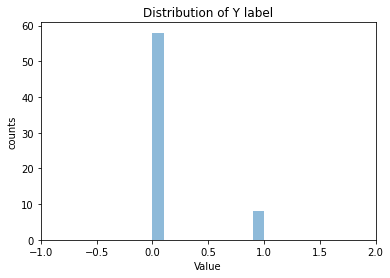

In [16]:
# create binary label 
"""
arg: 
    -- list with 1, 2, 3 
return: 
    -- list with 0, 1
"""
def binarize_ls_hoof(ls): 
    # init new_ls
    new_ls = []
    for i in ls: 
        if i > 2.5: 
            new_ls.append(1) 
        else: 
            new_ls.append(0) 

    print("check length: ", len(new_ls))
    return new_ls

Bi_Y = binarize_ls_hoof(Y)
inspect_y(Bi_Y)

### Spliting into train and test

In [17]:
#####################################################################
############## spliting into train and test and reshape for tf  #####
#####################################################################

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    # our X
    asymm_vars, 
    # our Y
    np.array(Bi_Y), 
    # training / testing ratio
    test_size=0.3, 
    random_state=12345)

print("y_test: ", y_test)

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]


# NOW, let test on different models

### For example, logistic regression, KNN, SVM

In [18]:
from sklearn.model_selection import train_test_split
# logistic review: https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [19]:
print("Have inputs: ")
print("original_vars_nor: ", original_vars_nor.shape)
print("asymm_vars: ", asymm_vars.shape)
print("Bi_Y: ", len(Bi_Y))

Have inputs: 
original_vars_nor:  (66, 20)
asymm_vars:  (66, 20)
Bi_Y:  66


### Evaluation function

In [20]:
# testing 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Function to transform y_pred to binary 
def prob_to_pred(y_pred): 
    result = [] 
    for i in y_pred: 
        if i[0] >= 0.5: 
            result.append(1) 
        else: 
            result.append(0) 
    return np.array(result)

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy :\n ",
    accuracy_score(y_test,y_pred)*100)
      
    print("F1 :\n ",
    f1_score(y_test, y_pred, average='macro'))

# Logistic regression

In [21]:
def training(X, Y, test_size, model):
    x_train, x_test, y_train, y_test = train_test_split(
        # our X
        X, 
        # our Y
        Y, 
        # training / testing ratio
        test_size=0.3, 
        random_state=12345)

    print("y_test: ", y_test)

    classifier = model
    clf = classifier.fit(x_train, y_train)
    
    # return model for parameter 
    return classifier, y_test, x_test

In [40]:
print("-----2024-06-19: significance test: ")

import statsmodels.api as sm
import pandas as pd

# Assume 'X' is your independent variables and 'y' is your dependent variable
# X should be a DataFrame of your predictors, and y should be a Series of your target
X=asymm_vars
y=np.array(Bi_Y)



""" 
shrink number of variables from 20 to 5
args: 
    list with length 20 
return: 
    list with length 5
"""
def sum_each_var(original_list):
    indices_group1 = [0, 5, 10, 15]
    indices_group2 = [i+1 for i in indices_group1]
    indices_group3 = [i+1 for i in indices_group2]
    indices_group4 = [i+1 for i in indices_group3]
    indices_group5 = [i+1 for i in indices_group4]
    all_indices = [indices_group1, indices_group2, indices_group3, indices_group4, indices_group5]

    # Sum elements from each group
    result = [sum(original_list[i] for i in indices_group) for indices_group in all_indices]
    #print(result)
    return result
    
"""using func for each row of X"""
X_small = np.zeros((66, 5))
for r in range(len(X)): 
    X_small[r] = sum_each_var(X[r])

-----2024-06-19: significance test: 


In [42]:
print("-----2024-06-19: significance test: ")

X = X_small
# Add intercept to X
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary to see coefficients and their standard errors
print(result.summary())

# Access coefficients and standard errors
coefficients = result.params
std_errors = result.bse

# Calculate t-values
t_values = coefficients / std_errors

# Calculate p-values (two-tailed)
p_values = result.pvalues

# Print t-values and p-values
print("T-values:", t_values)
print("P-values:", p_values)

-----2024-06-19: significance test: 
Optimization terminated successfully.
         Current function value: 0.328409
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   66
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.1108
Time:                        16:36:51   Log-Likelihood:                -21.675
converged:                       True   LL-Null:                       -24.376
Covariance Type:            nonrobust   LLR p-value:                    0.3688
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6634      1.653     -1.611      0.107      -5.903     

In [44]:
# using training function 
classifier, y_test, x_test = training(X= X_small, 
                      Y=np.array(Bi_Y), 
                      test_size=0.3, 
                      model=LogisticRegression(random_state=0))
# get prediction    
y_pred = classifier.predict(x_test)
# print accuracy
cal_accuracy(y_test, y_pred) 
# try obtain coefficient
"""one of the benefits from logistic regression"""
print(classifier.coef_, classifier.intercept_)

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[15  2]
 [ 3  0]]
Accuracy :
  75.0
F1 :
  0.42857142857142855
[[ 0.04956705 -0.04866325  0.13328815 -0.06322898 -0.09882746]] [-3.78530492]


### Dataset original_vars_nor

In [31]:
# using training function 
classifier, y_test, x_test = training(X=original_vars_nor, 
                      Y=np.array(Bi_Y), 
                      test_size=0.3, 
                      model=LogisticRegression(random_state=0))
# get prediction    
y_pred = classifier.predict(x_test)
# print accuracy
cal_accuracy(y_test, y_pred) 
# try obtain coefficient
"""one of the benefits from logistic regression"""
print(classifier.coef_, classifier.intercept_)

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[17  0]
 [ 3  0]]
Accuracy :
  85.0
F1 :
  0.45945945945945943
[[ 1.72986669e-02  4.15135779e-02  2.34718502e-03  5.84149062e-01
   5.54447814e-05 -9.51996089e-03 -7.90644471e-03 -1.00209616e-03
  -6.17656880e-01  4.82223630e-07 -4.70328287e-03 -9.10442263e-03
   4.40236074e-03 -6.98142978e-02 -7.74538372e-05 -6.80732114e-03
  -3.95110142e-02 -3.02888179e-03 -6.03142322e-01 -1.36838584e-04]] [-2.34061951]


# Decision Tree

In [45]:
max_depth = [4]   
min_samples_leaf = [2]

# search through md and ml 
for md in max_depth: 
    for ml in min_samples_leaf: 
        print("====== md: ", md, "===== ml: ", ml, "=====")
        # using training function 
        classifier, y_test, x_test = training(X=X_small, 
                              Y=np.array(Bi_Y), 
                              test_size=0.3, 
                              model=DecisionTreeClassifier(random_state = 0, max_depth=md, min_samples_leaf=ml))
        # get prediction    
        y_pred = classifier.predict(x_test)
        # print accuracy
        cal_accuracy(y_test, y_pred) 
        print("=====================")

====== md:  4 ===== ml:  2 =====
y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[15  2]
 [ 3  0]]
Accuracy :
  75.0
F1 :
  0.42857142857142855


In [33]:
max_depth = [4]   
min_samples_leaf = [2]

# search through md and ml 
for md in max_depth: 
    for ml in min_samples_leaf: 
        print("====== md: ", md, "===== ml: ", ml, "=====")
        # using training function 
        classifier, y_test, x_test = training(X=asymm_vars, 
                              Y=np.array(Bi_Y), 
                              test_size=0.3, 
                              model=DecisionTreeClassifier(random_state = 0, max_depth=md, min_samples_leaf=ml))
        # get prediction    
        y_pred = classifier.predict(x_test)
        # print accuracy
        cal_accuracy(y_test, y_pred) 
        print("=====================")

====== md:  4 ===== ml:  2 =====
y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[17  0]
 [ 3  0]]
Accuracy :
  85.0
F1 :
  0.45945945945945943


### Use original_vars_nor

In [34]:
max_depth = [4]   
min_samples_leaf = [2]

# search through md and ml 
for md in max_depth: 
    for ml in min_samples_leaf: 
        print("====== md: ", md, "===== ml: ", ml, "=====")
        # using training function 
        classifier, y_test, x_test = training(X=original_vars_nor, 
                              Y=np.array(Bi_Y), 
                              test_size=0.3, 
                              model=DecisionTreeClassifier(random_state = 0, max_depth=md, min_samples_leaf=ml))
        # get prediction    
        y_pred = classifier.predict(x_test)
        # print accuracy
        cal_accuracy(y_test, y_pred) 
        print("=====================")

====== md:  4 ===== ml:  2 =====
y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[17  0]
 [ 3  0]]
Accuracy :
  85.0
F1 :
  0.45945945945945943


# SVM

In [42]:
# from : https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/
# https://stackoverflow.com/questions/65898399/no-module-named-sklearn-datasets-samples-generator

### SVM with weighted classes

In [52]:
# update SVM 
# https://stackoverflow.com/questions/72246343/importerror-cannot-import-name-decisionboundarydisplay-from-sklearn-inspecti
#!pip install -U scikit-learn --user

# Try SVM 

In [46]:
from sklearn import svm
C=[100]
class_weight=[{1:1}]

for c in C: 
    for cw in class_weight: 
        # using training function 
        classifier, y_test, x_test = training(X=X_small, 
                              Y=np.array(Bi_Y), 
                              test_size=0.3, 
                              model=svm.SVC(kernel="rbf", C=c, class_weight=cw))
        # get prediction    
        y_pred = classifier.predict(x_test)
        # print accuracy
        cal_accuracy(y_test, y_pred) 

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[15  2]
 [ 3  0]]
Accuracy :
  75.0
F1 :
  0.42857142857142855


In [50]:
from sklearn import svm
C=[100]
class_weight=[{1:1}]

for c in C: 
    for cw in class_weight: 
        # using training function 
        classifier, y_test, x_test = training(X=original_vars_nor, 
                              Y=np.array(Bi_Y), 
                              test_size=0.3, 
                              model=svm.SVC(kernel="rbf", C=c, class_weight=cw))
        # get prediction    
        y_pred = classifier.predict(x_test)
        # print accuracy
        cal_accuracy(y_test, y_pred) 

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[17  0]
 [ 3  0]]
Accuracy :
  85.0
F1 :
  0.45945945945945943


In [51]:
from sklearn import svm
C=[100]
class_weight=[{1:1}]

for c in C: 
    for cw in class_weight: 
        # using training function 
        classifier, y_test, x_test = training(X=asymm_vars, 
                              Y=np.array(Bi_Y), 
                              test_size=0.3, 
                              model=svm.SVC(kernel="rbf", C=c, class_weight=cw))
        # get prediction    
        y_pred = classifier.predict(x_test)
        # print accuracy
        cal_accuracy(y_test, y_pred) 

y_test:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
Confusion Matrix: 
 [[16  1]
 [ 2  1]]
Accuracy :
  85.0
F1 :
  0.6571428571428571
